# Goal

The goal of this script is to extract a row from the `StakeholderDino_FRs.csv` spreadsheet, which relates to the functional requirements discussed as part of a single unstructured interview, and to represent the contents of that row pictorially. The true goal of which, is to allow the interviewees to confirm whether we have truly captured their requirements in a less complicated manner than requiring them to wrap their heads around the master spreadsheet format.

As always, start by importing modules, including the previously unused/lesser known [DataMapPlot](https://datamapplot.readthedocs.io/en/latest/index.html), which will be crucial for building an interactive mindmap-style plot. [Random](https://docs.python.org/3/library/random.html) allows for the generation of _pseudo_-random numbers.

## Potential issue

The outputted html is being reported (by Teams, Safari and Outlook) as containing malware. This is despite the package being [actively maintained on Github](https://github.com/TutteInstitute/datamapplot) and promoted through [matplotlib's third party package listings](https://matplotlib.org/thirdpartypackages/). Although its not impossible that it contains malware, it is unlikely.

## Issue resolved

Bypassing the issue by instead setting up a repository in Github which uses Pages to host the plots.

In [1069]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datamapplot
import seaborn as sns
from matplotlib.colors import rgb2hex

To use DataMapPlot, a set of 2D coordinates (such as a 2D numpy array) and a list of labels, one for each coordinate pair is required. As we wish to make a map where the coordinates form a circle, we shall try to employ polar coordinates as part of a for loop. The number of positions that need generating relates to the number of top-level 'attributes' in the [master spreadsheet](https://livemanchesterac.sharepoint.com/:x:/r/sites/UOM-RIT-RLP/Shared%20Documents/New%20RLP/Open,%20Reproducible%20and%20Responsible%20Research/ORR12%20Digital%20Notebooks%20%26%20Sample%20Inventories/02%20Definition/Functional%20Requirements/Stakeholders_FRs_Bens.xlsm?d=w9d0e97af6a054764832f14b4d0730ed5&csf=1&web=1&e=N3aDly), as depicted in the innermost circle of [Miro](https://miro.com/app/board/uXjVLdds0oo=/?share_link_id=490665046930). Hence, the most sustainable way to produce the plot requires reading in data from the spreadsheet.

In [1070]:
#import data
attrib_df = pd.read_csv('./data/AttributeDefinition.csv')
entries_df = pd.read_csv('./data/DefaultEntries.csv')

attrib_df

,ID,Name of Attributes,Description/expected content
0,TL-01,Name,Digital Notebook (DiNo) name
1,G-01,License,Source code of software can be made available ...
2,U-01,Customizable user interface,Individual operability of the DiNo can signifi...
3,U-02,Languages,Any additional language availability in the GU...
4,U-03,Support,This refers to all the support that a provider...
5,CF-01,Data input,Data entry into the DiNo can be done through v...
6,CF-02,Data import (formats),A DiNo should be able to import and attach all...
7,CF-04,Data export,"Again, departing from ELN Finder definition. T..."
8,CF-05,Templates,Templates are used for time saving and standar...
9,CF-06,Searchability,One of the most significant advantages of elec...


Now to create an array of 2D coordinates corresponding to the number of attributes in the sheet, now contained in the dataframe labelled `attrib_df`
> we relegate the ‘API’ functional attribute to below the top-level, and to instead be a feature of ‘Automation’(EF-03), so I also remove 'IT-01'.

In [1071]:
#Function for polar to cartesian conversion.
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)
    
#Remove 'TL-01', 'IT-01'.
attrib_df = attrib_df[~attrib_df['ID'].isin(['TL-01', 'IT-01'])]

rho=1 #Fix radius
arr_length = len(attrib_df)
arr = np.empty((arr_length, 2)) #Create empty array


for idx in range(arr_length):
    phi = idx/(arr_length) * (2*np.pi)
    arr[idx] = pol2cart(rho,phi)

arr


array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]])

Find the distance between two points to be able to a smaller radius, r_2, which can be used to set the random boundary for the points to be distributed within a circular region around the level one centrepoint (i.e. the coordinates already given in the array).

In [1072]:
#calculate the distance between two points of level 1.
diff = arr[0]-arr[1]
print(diff,diff[0],diff[1])
dist = np.sqrt(diff[0]**2+diff[1]**2)
dist

[ 0.04894348 -0.30901699] 0.04894348370484647 -0.3090169943749474


0.31286893008046174

Preprocess the attributes that has 3 levels, including 'G-01', 'EF-02' and 'EF-03'.
> We still keep 'Open source' element, becuase in the internew and survey this may be one of the option. 

In [1073]:
# G-01
G_01_l3 = entries_df['G-01'].dropna()
entries_df['G-01'] = entries_df['G-01'].apply(
    lambda x: "Yes" if isinstance(x, str) and x != 'Closed Source' else ("No" if isinstance(x, str) and x == 'Closed Source' else pd.NA))
is_duplicated = entries_df['G-01'].duplicated()

entries_df.loc[is_duplicated, 'G-01'] = pd.NA
G_01_l3=G_01_l3[G_01_l3!='Closed Source']
G_01_l3

#EF-02

Publication= ['BioMed Central (Springer Nature)', 'Dataverse', 'DSpace', 'eLife', 'F1000Research', 'FAIRDOM',
                     'Figshare','Galaxy','Github','JoVE', 'MethodsX (Elsevier)', 'Protocols.io']

CloudStorage = ['Dropbox','Egnyte','Elemental Machines','Google Drive','Microsoft Office Plug-in','One Drive' ]

LabManagement = ['Atlas CDS (Thermo Fisher Scientific)','CAS SciFinder (ACS)','Elemental Machines', 'iLab (Agilent)',
                       'Label printing (FLUICS)','Label Printing (Other)','RackScan Analyzer (Eppendorf)','SafeCode System (Eppendorf)',
                       'VisioNize sense (Eppendorf)']

DataAnalysis = ['Atlas CDS (Thermo Fisher Scientific)','ChemDoodle (iChemLabs)','ChemDraw (Revvity Signals)','Dataverse','FlowJo (BD)',
                      'Galaxy','Github','GraphPad Prism (Dotmatics)','ImageJ','Immunarch (ImmunoMind)','JS Mol','Jupyter (Notebook & Lab)',
                      'JupyterHub','Ketcher Editor','Logger Pro (Vernier)','Marvin JS (ChemAxon)','MarvinSketch (ChemAxon)',
                      'MassHunter (Agilent)','Microsoft Office Plug-in','mpVision (Modicus Prime)','OpenBabel','PlasMapper',
                      'Polygon AI (Rewire Neuro)','Quality Analyst (Northwest Analytics)','rakit','SAP BTP','SnapGene (Dotmatics)']

DataVisualisation = ['Atlas CDS (Thermo Fisher Scientific)','ChemDoodle (iChemLabs)','ChemDraw (Revvity Signals)','FlowJo (BD)','Galaxy',
                    'GraphPad Prism (Dotmatics)','ImageJ','JS Mol','Jupyter (Notebook & Lab)','JupyterHub','Ketcher Editor',
                    'Logger Pro (Vernier)','Marvin JS (ChemAxon)','MarvinSketch (ChemAxon)','Microsoft Office Plug-in',
                    'Mind the Graph (Cactus)','OpenBabel','PlasMapper','Polygon AI (Rewire Neuro)','Pubchem (NLM)',
                    'Quality Analyst (Northwest Analytics)','SnapGene (Dotmatics)']

DataImport = ['Atlas CDS (Thermo Fisher Scientific)','Biobank','BioMed Central (Springer Nature)','CAS SciFinder (ACS)',
                    'ChemDoodle (iChemLabs)','ChemDraw (Revvity Signals)','Dataverse', 'iLab (Agilent)','Ketcher Editor',
                    'Label printing (FLUICS)','Label Printing (Other)','LabX (Mettler Toledo)','Logger Pro (Vernier)','Marvin JS (ChemAxon)',
                    'MarvinSketch (ChemAxon)','MassHunter (Agilent)','OpenBabel','PlasMapper','Polygon Al (Rewire Neuro)','Pubchem (NLM)',
                    'RackScan Analyzer (Eppendorf)','rdkit','SafeCode System (Eppendorf)','SAP BTP','SnapGene (Dotmatics)',
                    'VisioNize sense (Eppendorf)','Winchat']

DataManagementPlanning = ['DMP Tool']

Coding = ['Github','JS Mol','Jupyter (Notebook & Lab)', 'JupyterHub', 'rdkit']

ReferenceManagement = ['Mendeley (Elsevier)','Zotero']

DocumentFormatting = ['GoogleDocs','InDesign (Adobe)','Libre Office','Microsoft Office Plug-in']

Collaboration = ['Box','Dataverse','Dropbox','Egnyte','Google Drive','GoogleDocs','Microsoft Office Plug-in','OneNote','Protocols.io',
                'SAP BTP','Slack','SnapGene (Dotmatics)','Teams']

InstrumentControl = ['Atlas CDS (Thermo Fisher Scientific)','Labx (Mettler Toledo)','MassHunter (Agilent)','RackScan Analyzer (Eppendorf)',
             'SafeCode System (Eppendorf)','VisioNize sense (Eppendorf)']

ProjectManagement = ['CAS SciFinder (ACS)','Evernote','Github','OneNote','SAP BTP']

EF_02_l2_attr = [ 
    Publication, CloudStorage,LabManagement,DataAnalysis,
             DataVisualisation,DataImport, DataManagementPlanning,
             Coding,ReferenceManagement,DocumentFormatting,
             Collaboration,InstrumentControl,ProjectManagement
             ]
EF_02_l2 = [
    'Publication', 'CloudStorage', 'LabManagement', 'DataAnalysis',
    'DataVisualisation', 'DataImport', 'DataManagementPlanning',
    'Coding', 'ReferenceManagement', 'DocumentFormatting',
    'Collaboration', 'InstrumentControl', 'ProjectManagement'
]


EF_02_l2 = EF_02_l2 + [None]*(len(entries_df)-len(EF_02_l2))
entries_df['EF-02'] = EF_02_l2



#EF-03

EF_03_l3 = entries_df['IT-01'].dropna()
entries_df.loc[len(entries_df['EF-03'].dropna())+1, 'EF-03'] = "API"
        

entries_df['EF-03']

0     Autoupload/folder watch
1             Business Logics
2               Data analysis
3              Device control
4                         NaN
               ...           
64                        NaN
65                        NaN
66                        NaN
67                        NaN
68                        NaN
Name: EF-03, Length: 69, dtype: object

Rename level 1 attributes.

In [1074]:
old_name = attrib_df['ID']
new_name = attrib_df['Name of  Attributes']
rename_dict = dict(zip(old_name, new_name))
entries_df.rename(columns=rename_dict,inplace=True )
entries_df

,TL-01,License,Customizable user interface,Languages,Support,Data input,Data import (formats),Data export,Templates,Searchability,...,Compliance,Laboratory management functions,Integrations and extensions,Automation,(Individual) Project management tools,Workflows,IT-01,Controlled vocabulary,Data access (client),Data storage location
0,Benchling Notebook,Yes,No,Amharic,Online documentation,Annotation,All formats,Complete content in document format,Define own templates,Advanced/conditional search,...,ADA,Asset management,Publication,Autoupload/folder watch,Calendar,Cross-project workflows,Command line input,No,Browser based,Cloud of own choice
1,Genemod,<NA>,Unknown,Bengali,"User training (online, on site)",Barcode Scanner,Audio formats,Complete content in machine readable format,Import from internet sources,BLAST Search,...,ASTM,Freezer Management,CloudStorage,Business Logics,NaN,Export possible,Java API,Unknown,Local client,Local
2,Labfolder (Labforward),No,Yes,Dutch,Support by provider (Consulting),Browser forms,Database formats,Direct publication option,Import of own templates,Database queries,...,CROMERRR,Instrument management,LabManagement,Data analysis,Taskboard,Graphical,NaN,Yes,Mobile Application,Provider's Cloud
3,LabID,<NA>,NaN,Egyptian Spoken Arabic,NaN,Chemical editor/sketching,Direct only (CF-01),Formats suitable for long term archiving,Microtitre plate templates,File/data hierarchy,...,FDA CFR 21 Part 11,Inventory (devices),DataAnalysis,Device control,Task management,Import possible,ODBC,NaN,Responsive Design,NaN
4,Labstep,<NA>,NaN,English,NaN,Dictation function,Document formats,Formats suitable for publication,Subject specific templates,Filtering,...,FERPA,LIMS connectivity,DataVisualisation,NaN,Unknown,No,Other API,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Sapio Platform (Triple Play),<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,SciCord,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Sciformation,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Scilligence,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With the distance, can set the limit of r_2.



In [1075]:
new_arr = []
l1_labels = []
l2_labels = []
l3_labels = []
hover_labels = []

entries_df = entries_df.drop(['TL-01', 'IT-01'],axis=1)

for idx1, column in enumerate(entries_df):
    
        coord_origin = arr[idx1]
        entries = entries_df[str(column)]
        entries = entries.dropna()
        entry_count =len(entries)
        #print(col)
        for idx2, entry in enumerate(entries):
            #random.random returns the next random floating-point number in the range 0.0 <= X < 1.0
            #coord_final = coord_origin + pol2cart(random.random()*(dist/2),random.random()*(2*np.pi))
            coord_final = coord_origin + pol2cart(dist/3,((2*np.pi)*(idx2/entry_count)))
            new_arr.append(coord_final)
            l1_labels.append(column)
            l2_labels.append(entry)
            hover_labels.append(entry)
            l3_labels.append('Unlabelled')
            #print(series.dropna())

#new_labels
l2_arr = np.array(new_arr)




Calculate the distance between two points of level 2.

In [1076]:
diff2 = l2_arr[0] - l2_arr[1]
print(diff2,diff2[0],diff2[1])
dist2 = np.sqrt(diff2[0]**2+diff2[1]**2)
dist2

[ 2.08579287e-01 -1.27717978e-17] 0.2085792867203078 -1.277179779252315e-17


0.2085792867203078

In [1077]:
def get_level3(l3, origin, l1_name, l2_name):
    l3_count = len(l3)
    for l3_idx, l3_entry in enumerate(l3):
        coord_final = origin + pol2cart(dist2 / 16, ((2 * np.pi) * (l3_idx / l3_count)))
        new_arr.append(coord_final.flatten())  
        l1_labels.append(l1_name)
        l2_labels.append(l2_name)
        hover_labels.append(l3_entry)
        l3_labels.append(l3_entry)

In [1078]:

#G-01
G_01_index = [i for i, (l1, l2) in enumerate(zip(l1_labels, l2_labels)) if l1 == 'License' and l2 == 'Yes']
coord_origin_G_01 = l2_arr[G_01_index]
get_level3(G_01_l3, coord_origin_G_01,'License', "Yes")

#EF-02

for sublist_idx, sublist in enumerate(EF_02_l2_attr):
    EF_02_index = [i for i, (l1, l2) in enumerate(zip(l1_labels, l2_labels)) if l1 == 'Integrations and extensions' and l2 == EF_02_l2[sublist_idx]]
    coord_origin_EF_02 = l2_arr[EF_02_index]
    get_level3(sublist, coord_origin_EF_02, 'Integrations and extensions', EF_02_l2[sublist_idx])
    

#EF-03
EF_03_index = [i for i, (l1, l2) in enumerate(zip(l1_labels, l2_labels)) if l1 == 'Automation' and l2 == 'API']
coord_origin_EF_03 = l2_arr[EF_03_index]
get_level3(EF_03_l3, coord_origin_EF_03, 'Automation', 'API')

l3_arr = np.array(new_arr)



In [ ]:
color_map = plt.get_cmap('tab20', len(unique_labels))

In [1095]:
# Define a list of unique labels
unique_labels = list(set(l1_labels+l2_labels+l3_labels+hover_labels))
color_map = plt.get_cmap('tab20', len(unique_labels))

# Create a dictionary to map each label to a color
custom_color_map = {label: color_map(i) for i, label in enumerate(unique_labels)}
print(len(custom_color_map))


259


With the coordinates listed, the attributes can be read in as labels, and plotted with DataMapPlot.

<InteractiveFigure width=100% height=800>
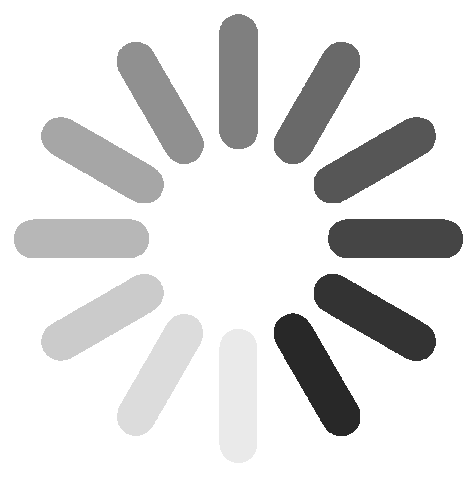

In [1096]:

plot = datamapplot.create_interactive_plot(
    l3_arr,
    l1_labels,
    l2_labels,
    l3_labels,
    hover_text=hover_labels,
    enable_search=True,
    background_color="#eeeeee",
    label_color_map= custom_color_map,
    color_label_text=False
)
plot

## From plot to page

Now, we need to add so-called ['Front matter'](https://jekyllrb.com/docs/front-matter/) to the plot to ensure that the plot appears as as single page in our Github Pages. We'll use a function do this

In [ ]:
def front_matter(figure):
    # Define the text to be added at the top of the HTML file
    header_text = """---
layout: page
title: Plot
permalink: plots
---
"""

    # Save the figure's HTML representation to a file
    figure.save('plots.html')

    # Read the saved HTML file
    with open('plots.html', 'r') as f:
        figure_html = f.read()

    # Combine the header text with the figure's HTML
    full_html = header_text + figure_html

    # Save the combined HTML to the file
    with open('plots.html', 'w') as f:
        f.write(full_html)

So we can test the function below

In [ ]:
front_matter(plot)